<a href="https://colab.research.google.com/github/Hari-Chandana-Karnam/Facial-Recognition-on-Lions/blob/main/HoG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
from skimage.feature import hog
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

## Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_female = []
df_male = []
df_female = glob.glob("drive/My Drive/dataset/Female/*.jpg")
df_male = glob.glob("drive/My Drive/dataset/Male/*.jpg")

## Data Preprocessing and Feature Extraction(HoG)

In [ ]:
images_output = []
labels= []
hog_features = []
for img in df_male:
  temp = cv2.imread(img)
  img = cv2.resize(temp, (256 , 256)) #Resizing all the images consistently 
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert all images to grayscale
  img_hist = cv2.equalizeHist(img_gray) # Histogram Equalization
  fd, hog_image = hog(img_hist, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True) # Extracting HoG features
  images_output.append(hog_image)
  hog_features.append(fd)
  labels.append(0) # Labeling the images
for img in df_female:
  temp = cv2.imread(img)
  img = cv2.resize(temp, (256 , 256))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_hist = cv2.equalizeHist(img_gray)
  fd, hog_image = hog(img_hist, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  images_output.append(hog_image)
  hog_features.append(fd)
  labels.append(1)

In [ ]:
images_output = np.array(images_output)
hog_features = np.array(hog_features)
labels = np.array(labels)
labels = labels.reshape(len(labels),1)
print('Shape of input images: ',images_output.shape)
print('Shape of input features: ',hog_features.shape)
print('Shape of output:',labels.shape)

Shape of input images:  (500, 256, 256)
Shape of input features:  (500, 34596)
Shape of output: (500, 1)


## Data Split (Train and Test)

In [ ]:
X_train,X_test = train_test_split(hog_features,test_size=0.2,random_state=42)
Y_train,Y_test=train_test_split(labels,test_size=0.2,random_state=42)
X_train,X_val = train_test_split(X_train,test_size=0.2,random_state=42)# splitting the train data again into train and validation data
Y_train,Y_val = train_test_split(Y_train,test_size=0.2,random_state=42)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_val shape:',X_val.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_val shape:',Y_val.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (320, 34596)
X_val shape: (80, 34596)
X_test shape: (100, 34596)
Y_train shape: (320, 1)
Y_val shape: (80, 1)
Y_test shape: (100, 1)


## Decision Trees

In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt.fit(X_train,np.argmax(Y_train,axis=1))
Y_pred_DT = dt.predict(X_test)

In [ ]:
print("accuracy: ",metrics.accuracy_score(Y_test, Y_pred_DT)*100)
print("precision: ",metrics.precision_score(Y_test,Y_pred_DT,average='weighted', labels=np.unique(Y_pred_DT)))
print("recall: ",metrics.recall_score(Y_test,Y_pred_DT,average='weighted', labels=np.unique(Y_pred_DT)))
print("roc: ",metrics.roc_auc_score(Y_test,Y_pred_DT,average='weighted', labels=np.unique(Y_pred_DT)))
print("f1 score: ",metrics.f1_score(Y_test, Y_pred_DT,average='weighted', labels=np.unique(Y_pred_DT)))

accuracy:  46.0
precision:  0.46
recall:  1.0
roc:  0.5
f1 score:  0.6301369863013699


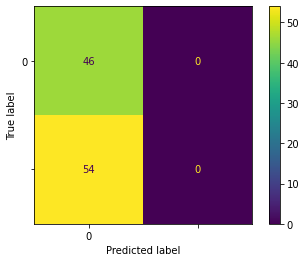

In [ ]:
plot_confusion_matrix(dt, X_test, Y_test)  
plt.show()

## KNN (K Nearest Neighbor)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,np.argmax(Y_train,axis=1))
Y_pred_KNN = knn.predict(X_test)

In [ ]:
print("accuracy: ",metrics.accuracy_score(Y_test, Y_pred_KNN)*100)
print("precison: ",metrics.precision_score(Y_test,Y_pred_KNN,average='weighted', labels=np.unique(Y_pred_KNN)))
print("recall: ",metrics.recall_score(Y_test,Y_pred_KNN,average='weighted', labels=np.unique(Y_pred_KNN)))
print("roc: ",metrics.roc_auc_score(Y_test,Y_pred_KNN,average='weighted', labels=np.unique(Y_pred_KNN)))
print("f1 score: ",metrics.f1_score(Y_test, Y_pred_KNN,average='weighted', labels=np.unique(Y_pred_KNN)))

accuracy:  46.0
precison:  0.46
recall:  1.0
roc:  0.5
f1 score:  0.6301369863013699


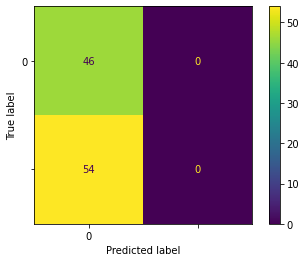

In [ ]:
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()


## Support Vector Machine(SVM)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)
Y_pred_SVM = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("accuracy: ",metrics.accuracy_score(Y_test, Y_pred_SVM)*100)
print("precison: ",metrics.precision_score(Y_test,Y_pred_SVM))
print("recall: ",metrics.recall_score(Y_test,Y_pred_SVM))
print("roc: ",metrics.roc_auc_score(Y_test,Y_pred_SVM))
print("f1 score: ",metrics.f1_score(Y_test, Y_pred_SVM))

accuracy:  77.0
precison:  0.7719298245614035
recall:  0.8148148148148148
roc:  0.7661030595813205
f1 score:  0.7927927927927928


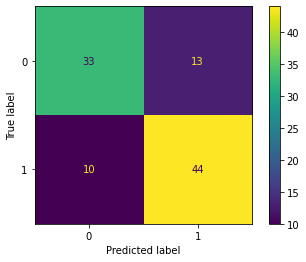

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test)  
plt.show()

## ANN

In [ ]:
model_ann = Sequential()
model_ann.add(layers.Dense(64, activation = 'relu', input_shape=X_train.shape[1:]))
model_ann.add(layers.Dense(64, activation='relu'))
model_ann.add(layers.Dense(1, activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ann.summary()
history = model_ann.fit(X_train, Y_train, epochs=300, validation_data=(X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                2214208   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,218,433
Trainable params: 2,218,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
10/10 [==============================] - 1s 44ms/step - loss: 1.1255 - accuracy: 0.5038 - val_loss: 0.7246 - val_accuracy: 0.5125
Epoch 2/300
10/10 [==============================] - 0s 25ms/step - loss: 0.7201 - accuracy: 0.5811 - val_loss: 0.7209 - val_accuracy: 0.5125
Epoch 3/300
10/10 [==============================] - 0s 25ms/step - loss: 0.6239 - accurac

In [ ]:
Y_pred_ann = model_ann.predict(X_test)

In [ ]:
print("accuracy: ",metrics.accuracy_score(Y_test, Y_pred_ann.round())*100)
print("precison: ",metrics.precision_score(Y_test, Y_pred_ann.round()))
print("recall: ",metrics.recall_score(Y_test, Y_pred_ann.round()))
print("roc: ",metrics.roc_auc_score(Y_test, Y_pred_ann.round()))
print("f1 score: ",metrics.f1_score(Y_test, Y_pred_ann.round()))

accuracy:  74.0
precison:  0.7916666666666666
recall:  0.7037037037037037
roc:  0.7431561996779389
f1 score:  0.7450980392156864


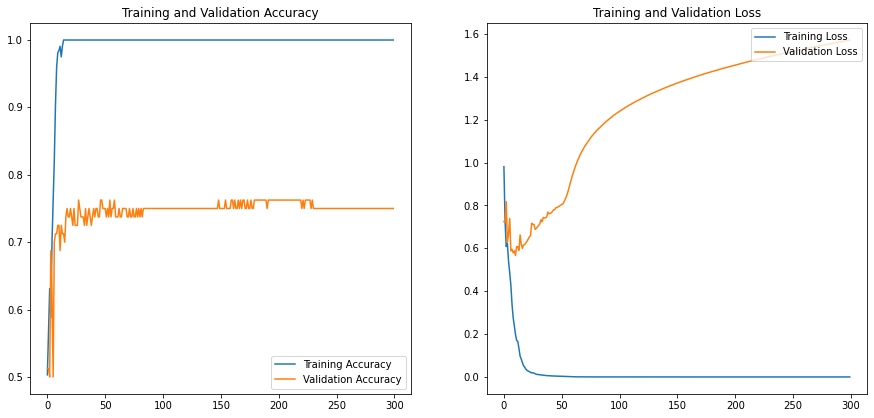

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
string = input("Enter the string: ")
sum = 0
for i in string:
  if(i == 'a'):
    sum += 1
  if(i == 'e'):
    sum += 2
  if(i == 'i'):
    sum += 3 
  if(i == 'o'):
    sum += 4
  if(i == 'u'):
    sum += 5 
print(sum)

Enter the string: Welcome to Indonesia
22


In [ ]:
amount = input("Enter the amount: ")
tax_percentage = input("Enter the tax percentage: ")
tax_amount = int(amount) * (int(tax_percentage)/100)
print("Tax amount in cents: ",tax_amount*100)

Enter the amount: 100
Enter the tax percentage: 30
Tax amount in cents:  3000.0


In [ ]:
def isVowel(character): # function to check whether input character is a vowel and assign value
  if(i == 'a'):
    return 1
  if(i == 'e'):
    return 2
  if(i == 'i'):
    return 3 
  if(i == 'o'):
    return 4
  if(i == 'u'):
    return 5

def sum(string, n): # function that returns the count of vowels
  if n == -1 :	# Base Case
	  return isVowel(string[0]) 
  return sum(string, n - 1) + isVowel(string[n - 1]) # Recursive Call

string = input("Enter the string: ")
print(sum(string, len(string))) 

Enter the string: Welcome to Indonesia
22


In [ ]:
import requests
from bs4 import BeautifulSoup
 
url = 'https://www.odoo.sh/faq'
the_word = 'odoo.sh'
r = requests.get(url, allow_redirects=False)
soup = BeautifulSoup(r.content, 'lxml')
words = soup.find(text=lambda text: text and the_word in text)
print(words)
count =  len(words)
print('\nUrl: {}\ncontains {} occurrences of word: {}'.format(url, count, the_word))

https://www.odoo.sh/project/<your_project>/settings

Url: https://www.odoo.sh/faq
contains 51 occurrences of word: odoo.sh
